The purpose of this workbook is to investigate what zip codes have the highest percent of rape incidents

In [56]:
from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/MATH_3439/'
graph_folder = '/content/drive/My Drive/Reducing Austin Crime/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
from matplotlib import pyplot as plt

In [58]:
df = pd.read_csv(drive_dir + 'data/2016_austin_crime.csv')
df

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,3129181.0,10106923.0
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701.0,11.00,3113643.0,10070357.0
4,2.016110e+08,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,NaN,C,10-Mar-16,E,78753.0,18.33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37456,2.016505e+10,7.0,THEFT,Theft,31-Dec-16,8822 MC CANN DR ...,N,3-Jan-17,B,78757.0,18.17,3117454.0,10109065.0
37457,2.016505e+10,9.0,THEFT,Theft,31-Dec-16,123 W 6TH ST ...,N,3-Jan-17,G,78701.0,11.00,3113924.0,10070794.0
37458,2.016801e+10,1.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,5601 EXETER DR ...,N,16-Jan-17,I,78723.0,21.06,3132812.0,10084356.0
37459,2.016801e+10,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,101 HERGOTZ LN ...,N,12-Jan-17,H,78742.0,23.10,3131778.0,10062481.0


#Cleaning the data

In [59]:
df = df.drop(['GO Primary Key', 'GO Census Tract', 'GO Location'],1)

In [60]:
df.columns = ['council_district', 'apd_desc', 'fbi_desc', 'report_date', 'clearance_status', 'clearance_date', 'district', 'location_zip', 'x', 'y']
df

,council_district,apd_desc,fbi_desc,report_date,clearance_status,clearance_date,district,location_zip,x,y
0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,C,12-Jan-16,D,78735.0,3067322.0,10062796.0
1,9.0,THEFT,Theft,1-Jan-16,C,4-Jan-16,G,78701.0,3114957.0,10070462.0
2,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,N,3-May-16,E,78753.0,3129181.0,10106923.0
3,9.0,THEFT,Theft,1-Jan-16,N,22-Jan-16,G,78701.0,3113643.0,10070357.0
4,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,C,10-Mar-16,E,78753.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
37456,7.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,B,78757.0,3117454.0,10109065.0
37457,9.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,G,78701.0,3113924.0,10070794.0
37458,1.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,16-Jan-17,I,78723.0,3132812.0,10084356.0
37459,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,12-Jan-17,H,78742.0,3131778.0,10062481.0


In [61]:
df['apd_desc'] = df['apd_desc'].str.strip()
df['fbi_desc'] = df['fbi_desc'].str.strip()
df['clearance_status'] = df['clearance_status'].str.strip()

In [ ]:
df['location_zip']

In [53]:
df['location_zip'] = df['location_zip'].astype(int)

KeyError: ignored

In [ ]:
#We are defining all rape under one category since we do not think the different 'types' matter. It is all rape.
df['apd_desc'] = df['apd_desc'].replace(['SEXUAL ASSAULT W/ OBJECT', 'RAPE', 'RAPE OF A CHILD',
       'AGG RAPE OF A CHILD', 'SEXUAL ASSAULT OF CHILD/OBJECT',
       'AGG SEXUAL ASSAULT CHILD/OBJEC', 'FORCED SODOMY',
       'AGG SEXUAL ASSAULT W OBJECT', 'AGG FORCED SODOMY OF CHILD',
       'AGG RAPE', 'AGG FORCED SODOMY', 'FORCED SODOMY OF CHILD'], 'Rape')

# Programs
  - Creating programs that:
    - return a df that has zip and the amount of crimes in that zip
    - create a bar chart with the top 5 counts for zip

In [ ]:
#creates dataframe with two columns 'zip' and 'count', which is how many crimes happened in that zip

def create_df(kind):

  new_df = df[df['fbi_desc'] == kind]
  new_list = []
  for zip, group in new_df.groupby('location_zip'):
    count = group['apd_desc'].count()
    new_list.append([zip,count])
  
  list_df = pd.DataFrame(new_list, columns = ['zip', 'count'])

  return list_df

In [ ]:
# creates bar chart with top 5 zip codes in that crime and the percentage for that category
# cannot make the figsize bigger bc when we save it, the graph gets cut off
def bar_chart(c_df, name, category, subcategory, n = 5):
  c_df.nlargest(n, ['count']).plot(kind = 'barh', x = 'zip', y = 'count', title = name)

  x_ax = c_df.nlargest(n,['count'])['count'].tolist()

  total_df = df[df['fbi_desc'] == category]
  subtotal = total_df[total_df['apd_desc'] == subcategory].shape[0]
  for index, value in enumerate(x_ax):
    perc = round(value/subtotal*100,2)
    plt.text(value, index, str(perc) + '%')
  
  plt.tight_layout()

##Here we will be finding the top 5 zip codes for rape in terms of count and percentage

In [ ]:
rape_df = create_df('Rape')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


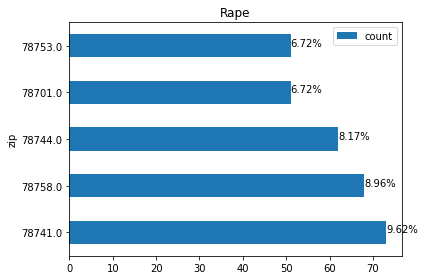

In [ ]:
#We lose some counts b/c 44 zips are NaN, so these are not 100% accurate, but give us an idea
bar_chart(rape_df,'Rape','Rape', 'Rape')
plt.savefig(graph_folder + 'graphs/rape_bar.eps', format = 'eps')